# EXP3 Snippets:  Wave Explorer

This notebook provides function and plots to explore plane waves and spherical waves. You may need some experience in Python programming. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep,time
from ipycanvas import MultiCanvas, hold_canvas,Canvas
import matplotlib as mpl
import matplotlib.cm as cm


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 

## Plane Waves

A plane wave is a solution of the homogeneous wave equation and is given in its complex form by 

\begin{equation}
U=Ae^{-i\vec{k}\cdot \vec{r}}e^{i\omega t},
\end{equation}

where the two exponentials contain a spatial and a temporal phase. $A$ denotes the amplitude of the plane wave. The plane is defined by the shape of the wavefront which is given by $\vec{k}\cdot \vec{r}=const$, which is just the definition of a plane perpendicular to $\vec{k}$.

A wave is a physical quantity which oscillates in space and time. Its energy current density is related to the square magnitude of the amplitude. We will include in the following the spatial and the temporal phase. For plotting just the spatial variation of the wave, you may just use the spatial part of the equation

\begin{equation}
U(\vec{r})=Ae^{-i\vec{k}\cdot \vec{r}}.
\end{equation}

But since we also want to see the wave propagate, we will directly include also the temporal dependence on our function. In all of the computational examples below we set the amplitude of the wave $A=1$. 

The propagation of the wave is defined by the wavevector $\vec{k}$. In vacuum, the wavevector is just real valued,

\begin{equation}
\vec{k}_{0}=
\begin{pmatrix}
k_{0x} \\
k_{0y}\\
k_{0z}\\
\end{pmatrix}.
\end{equation}


The wavevector is providing the direction in which the wavefronts propagate. It is also proportional to the momentum of the wave, which will be important if we consider the refraction process a bit later. The magnitude of the wavevector is related to the wavelength $\lambda$ and called the wavenumber, 

\begin{equation}
k_{0}=\frac{2\pi}{\lambda_{0}}=\frac{\omega}{c_{0}}.
\end{equation}

At the same time, its magnitude is also given by the frequency of the light devided by the wave vector. The latter is called a dispersion relation. 

With a few lines of Python code, we will explore plane waves as well as their propagation. 

In [3]:
def plane_wave(k,omega,r,t):    
    return(np.exp(1j*(np.dot(k,r)-omega*t)))

Let us have a look at waves and wave propagation. We want to create a wave which has a wavelength of 532 nm in vacuum.

In [4]:
wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

It shall propagate along the z-direction and we will have a look at the x-z plane.

In [5]:
vec=np.array([0.,0.,1.])
vec=vec/np.sqrt(np.dot(vec,vec))

k=k0*vec

We can plot the electric field in the x-z plane by defining a grid of points (x,z). This is done by the *meshgrid* function of *numpy*. The meshgrid returns a 2-dimensional array for each coordinate. Have a look at the values in the meshgrid.

In [6]:
x=np.linspace(-2.5e-6,2.5e-6,300)
z=np.linspace(0,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z],dtype=object)

In the last lines, we defined an array of X,0,Z, where X and Z are already 2-dimensional array. This finally gives an array 3D vectors, which we can use to calculate the electric field at any point in space. If we want to plot the electric field, we have to calculate the real part of the complex values, as the electric field is a physical quantity, which is always real. There is not much to see for a plane wave in the intensity plot, as the intensity of a plane wave is constant in space. Yet, if you want to plot it, you have to calculate the magnitude square of the electric field, e.g.,

\begin{equation}
I\propto |E|^{2}
\end{equation}

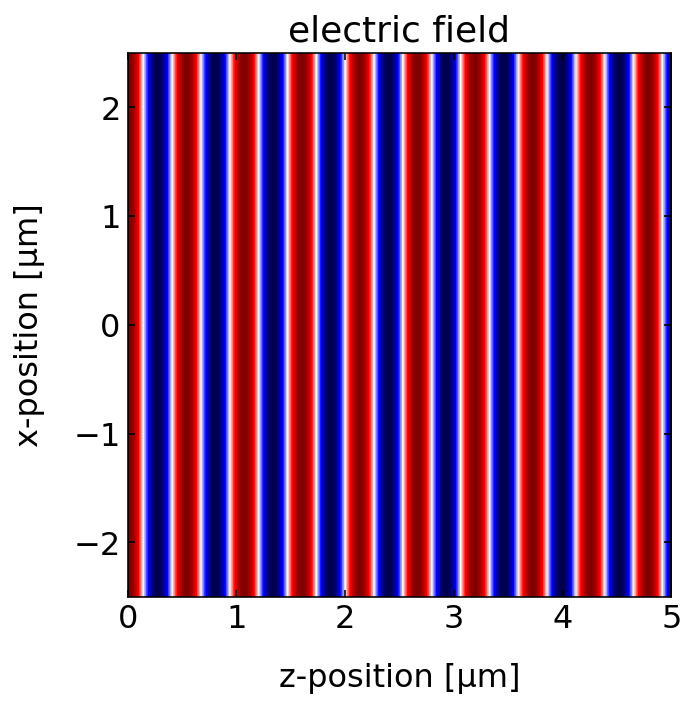

In [7]:
plt.figure(figsize=(12,5))
field=plane_wave(k,omega0,r,0)
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6

plt.title('electric field')
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-1,vmax=1,cmap='seismic')
plt.xlabel('z-position [µm]')
plt.ylabel('x-position [µm]')


plt.show()

### Plane wave propagation

The above graph shows a static snapshot of the plane wave at a time $t=0$. We know, however, that a plane wave is propagating in space and time. 
Since we know how to animate things, we may do that using the `ipycanvas` module.

In [8]:
x=np.linspace(-2.5e-6,2.5e-6,300)
z=np.linspace(0,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z],dtype=object)

In [9]:
canvas = Canvas(width=300, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

To do the animation I use a little trick to get the same color map as in the matplotlib plotting. The function below uses the matplotlib color map `seismic` and the corresponding mapping of values with a given minimum `vmin` and maximum `vmax` value. The mapping is done in the animation function with `c=m.to_rgba(tmp)`.

In [10]:
#normalize the color map to a certain value range
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

#call the color map
cmap = cm.seismic

# do the mapping of values to color values.
m = cm.ScalarMappable(norm=norm, cmap=cmap)

This is our animation function, where I provide time and the wavevector as arguments, such that we may change both parameters easily.

In [11]:
def animate(k,time):
    for t in time:
        field=plane_wave(k,omega0,r,t)        
        tmp=np.real(field.transpose())
        c=m.to_rgba(tmp)
        with hold_canvas(canvas):
            canvas.put_image_data(c[:,:,:3]*255,0,0)
            #canvas.put_image_data(data*255,0,0)
        sleep(0.02)

With the call below, you may animate the wave now with different refractive indices.

In [12]:
eta=1
kappa=0
n=eta+kappa*1j

k=n*k0*vec
time= np.linspace(0,5e-14,500)
animate(k,time)

|<img src="img/plane_prop.mov" width="50%"> |
|-|
| **Fig.:** . Propagating spherical waves for positive and negative wavenumber.|

## Spherical Waves

A spherical wave is as well described by two exponentials containing the spatial and temporal dependence of the wave. The only difference is that the wavefronts shall describe spheres instead of planes. We, therefore, need $|\vec{k}||\vec{r}|=k r=const$. The product of the magntitudes of the wavevector and the distance from the source are constant. If we further generalize the position of the source to $\vec{r}_{0}$, we can write a spherical wave by 

\begin{equation}
U=\frac{A}{|\vec{r}-\vec{r}_{0}|}e^{-i k|\vec{r}-\vec{r}_{0}|} e^{i\omega t}.
\end{equation}

Note that we have to introduce an additional scaling of the amplitude with the inverse distance of the source. This is due to energy conservation, as we require that all the energy that flows through all spheres around the source is constant.

In [13]:
def spherical_wave(k,omega,r,r0,t):
    k=np.linalg.norm(k)*np.sign(k[2])
    d=np.linalg.norm(r-r0)
    return( np.exp(1j*(k*d-omega*t))/d)

Let us have a look at the electric field of the spherical wave. Below is some code plotting the electric field is space. The source is at the origin and the plot nicely shows that the amplitude decays with the distance.

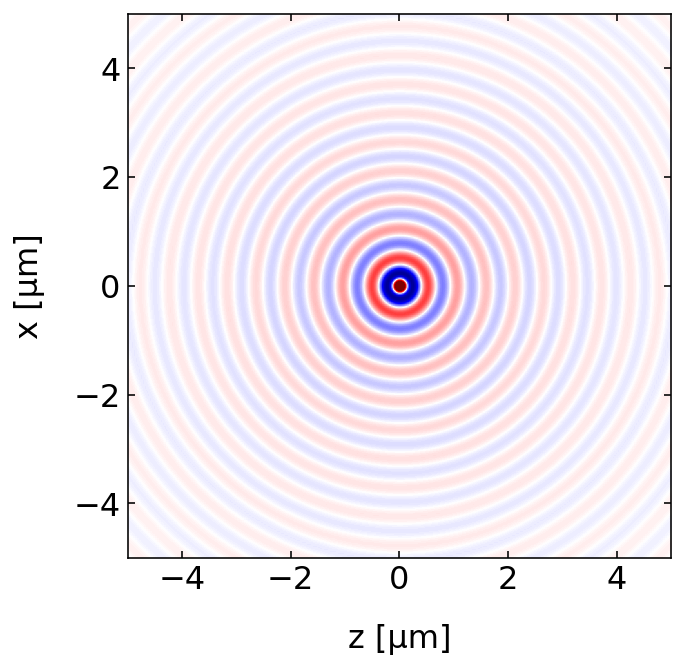

In [14]:
plt.figure(figsize=(5,5))

x=np.linspace(-5e-6,5e-6,300)
z=np.linspace(-5e-6,5e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z],dtype=object)

wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c

k=k0*np.array([0,0,1.])
r0=np.array([0,0,0])

field=spherical_wave(k,omega0,r,r0,0)

extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-5e6,vmax=5e6,cmap='seismic')

plt.xlabel('z [µm]')
plt.ylabel('x [µm]')
plt.show()

The line plots below shows that the field amplitude rapidly decays and the intensity follows a $1/r^2$ law as expected. The slight deiviation at small distances is an artifact from our discretization. We used the image above to extract the line plot and, therefore, never exactly hit $r=0$. 

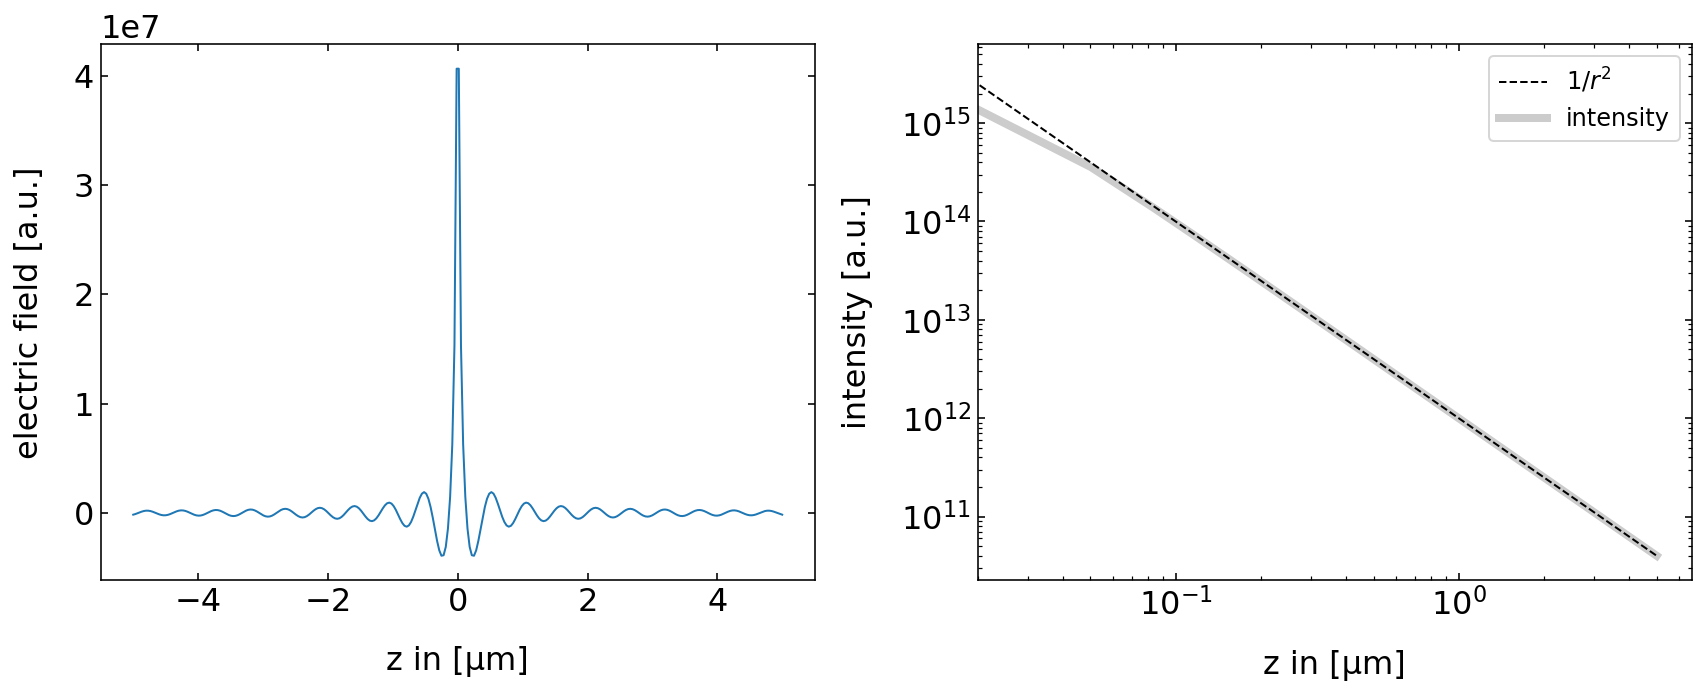

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(z*1e6,np.real(field.transpose()[150,:]))
plt.xlabel('z in [µm]')
plt.ylabel('electric field [a.u.]')


plt.subplot(1,2,2)
plt.loglog(z*1e6,1/(z**2),'k--',label='$1/r^2$')
plt.loglog(z*1e6,np.abs(field.transpose()[150,:])**2,color='k',alpha=0.2,lw=4,label='intensity')
plt.xlabel('z in [µm]')
plt.xlim(2e-2,)
plt.ylabel('intensity [a.u.]')
plt.legend()
plt.tight_layout()
plt.show()

### Spherical wave propagation

We can also visualize the animation our spherical wave to check for the direction of the wave propagation.

In [16]:
norm = mpl.colors.Normalize(vmin=-5e6, vmax=5e6)
cmap = cm.seismic
m = cm.ScalarMappable(norm=norm, cmap=cmap)

In [17]:
canvas = Canvas(width=300, height=300,sync_image_data=True)
display(canvas)

Canvas(height=300, sync_image_data=True, width=300)

In [18]:
def animate(k,time):
    for t in time:
        field=spherical_wave(k,omega0,r,r0,t)
        data=np.zeros([300,300,3])
        tmp=np.real(field.transpose())
        c=m.to_rgba(tmp)
        with hold_canvas(canvas):
            canvas.put_image_data(c[:,:,:3]*255,0,0)
        sleep(0.02)

In [19]:
time= np.linspace(0,2e-14,400)
animate(k,time)

|<img src="img/out.mov" width="40%">  <img src="img/in.mov" width="40%"> |
|-|
| **Fig.:** . Propagating spherical waves for positive and negative wavenumber.|